Shape X: (1797, 64)
Shape y: (1797,)


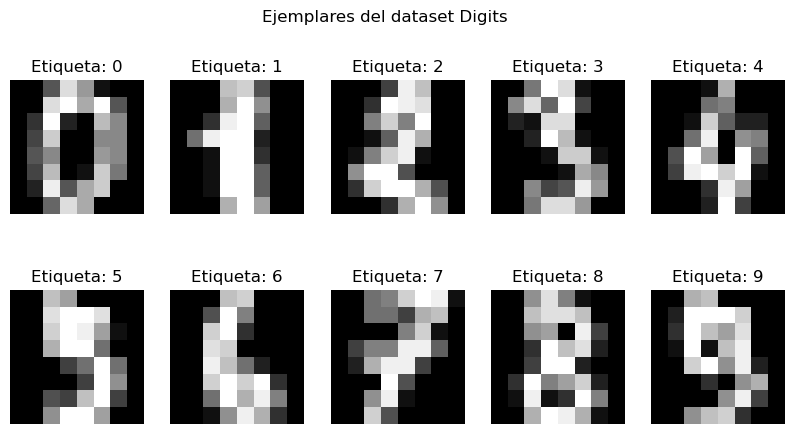

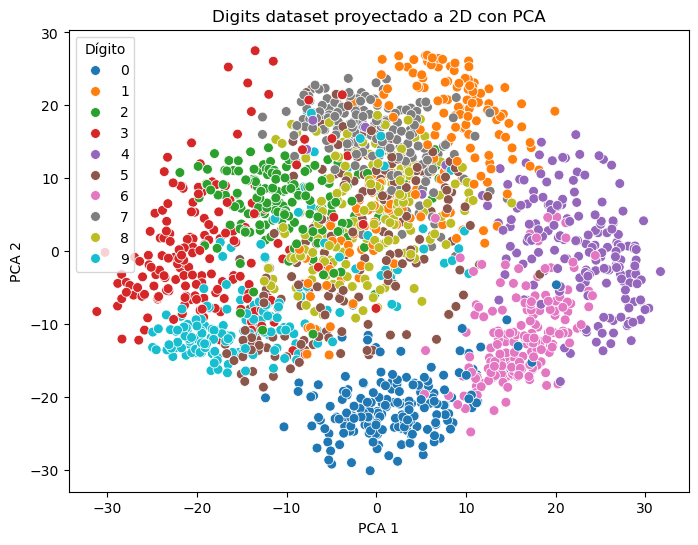

In [1]:
# Importamos las bibliotecas para traer e imprimir el dataset.
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import seaborn as sns

# Cargamos el dataset.
digits = load_digits()
X, y = digits.data, digits.target

print("Shape X:", X.shape)  # (1797, 64)
print("Shape y:", y.shape)  # (1797,)

# Mostramos algunas imágenes.
fig, axes = plt.subplots(2, 5, figsize=(10,5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"Etiqueta: {y[i]}")
    ax.axis("off")
plt.suptitle("Ejemplares del dataset Digits")
plt.show()

# Visualización en 2D con PCA.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=y, palette="tab10",
    legend="full", s=50
)
plt.title("Digits dataset proyectado a 2D con PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Dígito")
plt.show()

In [10]:
# Importamos de la biblioteca el dataset, el modelo y las métricas.
from sklearn.datasets import load_digits
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargamos el dataset y preparamos los datos y etiquetas.
dig = load_digits()
x = dig.data
y = dig.target

# Mostramos la cantidad de muestras y las categorías que incluye el dataset.
print("Shape X:", x.shape, "Shape y:", y.shape, "\n")
print("Variables:", dig.feature_names, "\n")

# Dividimos la información para entrenar el modelo.
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3, random_state = 42
)

# Creamos y entrenamos al modelo.
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
abc.fit(x_train, y_train)

# Ponemos a prueba el modelo (Clasificación de dígitos).
y_pred = abc.predict(x_test)

# Aplicamos las métricas para medir el rendimiento del modelo.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')

# Imprimimos los resultados de las métricas.
print(f"Accuracy:  {accuracy: .4f}")
print(f"Precision: {precision: .4f}")
print(f"Recall:    {recall: .4f}")
print(f"F1:        {f1: .4f}")

Shape X: (1797, 64) Shape y: (1797,) 

Variables: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'] 

Accuracy:   0.7981
Precision:  0.8228
Recall:     0.7993
F1:         0.7949


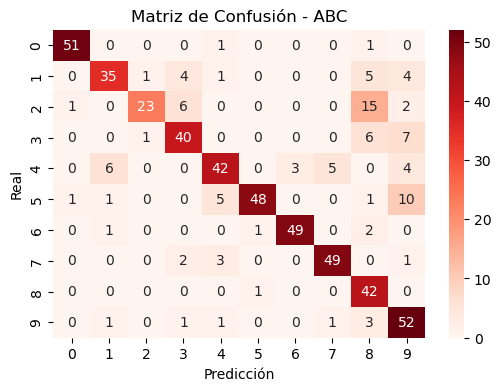

In [16]:
# Importamos las bibliotecas para crear la matriz de confución.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=dig.target_names,
            yticklabels=dig.target_names)
plt.title("Matriz de Confusión - ABC")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

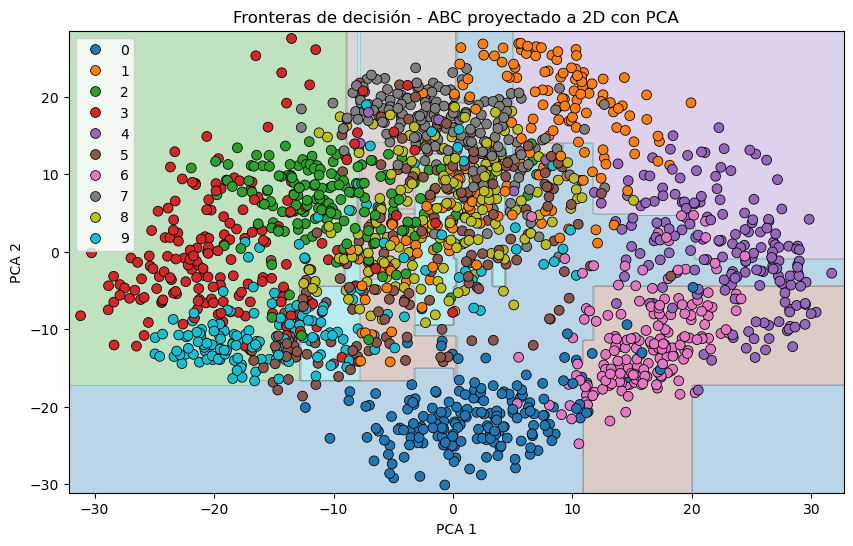

In [15]:
# Importamos las bibliotecas para traer e imprimir el dataset.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier

# Cargamos dataset.
digits = load_digits()
X, y = digits.data, digits.target

# Reducimos a 2D con PCA para poder graficar.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Entrenamos al modelo AdaBoost.
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_pca, y)

# Creamos una malla para graficar las fronteras de decisión.
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predicciones en la malla.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Generamos el gráfico.
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="tab10")  # regiones de decisión
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y, palette="tab10", s=50, edgecolor="k", legend="full"
)
plt.title("Fronteras de decisión - ABC proyectado a 2D con PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()